In [2]:
#Import needed packages

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset



import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_curve
from sklearn import metrics

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold


In [3]:
#load preprocessed data
mrna_x = pd.read_csv('processed_mrna_zscore_only.csv')
mrna_x.drop(columns=mrna_x.columns[0], axis=1, inplace=True)
print(mrna_x.shape)

mutation_x = pd.read_csv('processed_mutation_data.csv')
mutation_x.drop(columns=mutation_x.columns[0], axis=1, inplace=True)
print(mutation_x.shape)

meth_x = pd.read_csv('processed_methlyation_data.csv')
meth_x.drop(columns=meth_x.columns[0], axis=1, inplace=True)
meth_x.fillna(0, inplace=True)
print(meth_x.shape)


#mrna_x.drop('target', axis=1, inplace=True)
y = np.load('processed_recurrence_data_zscore_mutation_methlyation.npy')
print(y.shape)

age = np.load('age_data_mutation_methylation.npy')
gender = np.load('gender_data_mutation_methlyation.npy')
stage = np.load('stage_data_mutation_methylation.npy')

# Try using lasso (feature selection), feature importance, shap


(210, 19910)
(210, 11390)
(210, 16451)
(210,)


In [4]:
X_train_mrna, X_test_mrna, y_train_mrna, y_test_mrna = train_test_split(mrna_x.values, y,
                                                    train_size=0.75, test_size=0.25, random_state=123)

# parameters to be tested on GridSearchCV
# Initializing the Model
lasso = Lasso()

# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001, random_state=123)
lasso1.fit(X_train_mrna, y_train_mrna)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

filtered_mrna_subset=np.array(mrna_x.columns)[lasso1_coef>0.00001]

print(len(filtered_mrna_subset))
print(filtered_mrna_subset)

filtered_mrna_x = mrna_x[filtered_mrna_subset]

print(filtered_mrna_x.shape)


mrna_X_train_1, mrna_X_test_testing, mrna_y_train_1, mrna_y_test_testing = train_test_split(filtered_mrna_x.values, y,
                                                    train_size=0.80, test_size=0.20, shuffle=True, random_state=123)
mrna_X_train, mrna_X_test, mrna_y_train, mrna_y_test = train_test_split(mrna_X_train_1, mrna_y_train_1,
                                                    train_size=0.75, test_size=0.25, shuffle=True, random_state=123)


1518
['LOC100130426' 'UBE2Q2P3' 'UBE2Q2P3.1' ... 'FLJ21142' 'ZNF717' 'ZNF804B']
(210, 1518)


c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.834e-03, tolerance: 3.511e-03
  model = cd_fast.enet_coordinate_descent(


In [89]:
#load preprocessed data
mrna_x = pd.read_csv('zscore_mutation.csv')
mrna_x.drop(columns=mrna_x.columns[0], axis=1, inplace=True)
print(mrna_x.head())

#mrna_x.drop('target', axis=1, inplace=True)
y = np.load('processed_recurrence_data_zscore_mutation.npy')
print(mrna_x.shape)
X_train, X_test, y_train, y_test = train_test_split(mrna_x.values, y,
                                                    train_size=0.75, test_size=0.25)

age = np.load('age_data_mutation.npy')
gender = np.load('gender_data_mutation.npy')
stage = np.load('stage_data_mutation.npy')

names=mrna_x.columns
print("Column Names: {}".format(names.values))
print(len(names))

lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

feature_subset=np.array(names)[lasso1_coef>0.01]

lasso_x = mrna_x[feature_subset]

lasso_x['Age'] = age
lasso_x['Gender'] = gender
lasso_x['Stage'] = stage


X_train_1, X_test_testing, y_train_1, y_test_testing = train_test_split(lasso_x.values, y,
                                                    train_size=0.80, test_size=0.20, shuffle=True, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1,
                                                    train_size=0.75, test_size=0.25, shuffle=True, random_state=123)


   LOC100130426  UBE2Q2P3  UBE2Q2P3.1  TIMM23  LOC155060  RNU12-2P    SSX9  \
0       -3.0863    0.3223     -0.7343  0.1476     0.9885   -0.1476 -0.9372   
1       -3.0863    1.4031      1.3759 -1.3732     2.0512   -0.5081 -0.9372   
2       -3.0863    1.5672      1.6364  0.4353     0.6953    1.2612 -0.9372   
3       -3.0863    0.9756      1.2166  0.0829     0.2252    0.5166 -0.9372   
4       -3.0863    1.2136      1.5562 -1.1680     0.5609    0.4829 -0.9372   

    EZHIP  EFCAB8  SRP14P1  ...  ZSWIM6 Mutation  ZSWIM8 Mutation  \
0  0.6324  5.0700  -0.2790  ...                0                0   
1 -0.3527 -0.5518   0.4855  ...                0                0   
2 -1.5927  0.2084  -1.5463  ...                0                0   
3 -0.8073 -1.5707  -2.1707  ...                0                1   
4 -1.5927 -1.5707  -1.6107  ...                0                0   

   ZUFSP Mutation  ZW10 Mutation  ZWINT Mutation  ZXDA Mutation  \
0               0              0               0 

c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.717e-02, tolerance: 5.974e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\nitin\AppData\Local\Temp\ipykernel_34504\2813507712.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasso_x['Age'] = age
C:\Users\nitin\AppData\Local\Temp\ipykernel_34504\2813507712.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 15)
rf.fit(X_train, y_train)
print(rf.score(X_test_testing, y_test_testing))
acc_rf = rf.score(X_test_testing, y_test_testing)
y_prob_rf = rf.predict_proba(X_test_testing)[:,1]
y_pred_rf = rf.predict(X_test_testing)

0.7702702702702703


In [5]:
X_train_mut, X_test_mut, y_train_mut, y_test_mut = train_test_split(mutation_x.values, y,
                                                    train_size=0.75, test_size=0.25, random_state=123)

# Initializing the Model
lasso = Lasso()


lasso1 = Lasso(alpha=0.00001, random_state=123)
lasso1.fit(X_train_mut, y_train_mut)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)
filtered_mutation_subset=np.array(mutation_x.columns)[lasso1_coef>0.001]

filtered_mutation = mutation_x[filtered_mutation_subset]

print(filtered_mutation.shape)

mut_X_train_1, mut_X_test_testing, mut_y_train_1, mut_y_test_testing = train_test_split(filtered_mutation.values, y,
                                                    train_size=0.80, test_size=0.20, shuffle=True, random_state=123)
mut_X_train, mut_X_test, mut_y_train, mut_y_test = train_test_split(mut_X_train_1, mut_y_train_1,
                                                    train_size=0.75, test_size=0.25, shuffle=True, random_state=123)



(210, 316)


c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.010e-02, tolerance: 3.511e-03
  model = cd_fast.enet_coordinate_descent(


In [6]:

X_train_meth, X_test_meth, y_train_meth, y_test_meth = train_test_split(meth_x.values, y,
                                                    train_size=0.75, test_size=0.25)

lasso = Lasso()


lasso1 = Lasso(alpha=0.00001, random_state=123)
lasso1.fit(X_train_meth, y_train_meth)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)
filtered_methylation_subset=np.array(meth_x.columns)[lasso1_coef>0.001]

filtered_methylation= meth_x[filtered_methylation_subset]

print(filtered_methylation.shape)

meth_X_train_1, meth_X_test_testing, meth_y_train_1, meth_y_test_testing = train_test_split(filtered_methylation.values, y,
                                                    train_size=0.80, test_size=0.20, shuffle=True, random_state=123)
meth_X_train, meth_X_test, meth_y_train, meth_y_test = train_test_split(meth_X_train_1, meth_y_train_1,
                                                    train_size=0.75, test_size=0.25, shuffle=True, random_state=123)




(210, 397)


c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.115e-02, tolerance: 3.603e-03
  model = cd_fast.enet_coordinate_descent(


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [101]:
class MrnaModel(nn.Module):
    def __init__(self, input_shape):
        super(MrnaModel, self).__init__()
        self.fc1 = nn.Linear(input_shape, math.floor(input_shape/2))
        self.fc2 = nn.Linear(math.floor(input_shape/2), 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

In [9]:
class MutationModel(nn.Module):
    def __init__(self):
        super(MutationModel, self).__init__()
        self.fc1 = nn.Linear(filtered_mutation.shape[1], math.floor(filtered_mutation.shape[1]/2))
        self.fc2 = nn.Linear(math.floor(filtered_mutation.shape[1]/2), 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

In [10]:
class MethModel(nn.Module):
    def __init__(self):
        super(MethModel, self).__init__()
        self.fc1 = nn.Linear(filtered_methylation.shape[1], math.floor(filtered_methylation.shape[1]/2))
        self.fc2 = nn.Linear(math.floor(filtered_methylation.shape[1]/2), 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

In [102]:
class CombinedModel(nn.Module):
    def __init__(self):
        super(CombinedModel, self).__init__()
        self.fc1 = nn.Linear(30, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x), dim=1)

In [33]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    train_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        # Compute prediction error

        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))

        # Backpropagation
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    loss = loss/len(dataloader.dataset)
    #print(f"loss: {loss:>7f}")
    return loss.item()

In [128]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            prob = model(X)
            test_loss += loss_fn(prob, y.unsqueeze(1)).item()
            pred = 1*(prob > 0.5).ravel()
            correct += (pred == y).type(torch.float).sum().item()
    test_loss /= size
    accuracy = correct / size
    #print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, accuracy

In [129]:
from sklearn.preprocessing import StandardScaler

In [137]:
sc = StandardScaler()
mrna_X_train_scaled = sc.fit_transform(X_train)
mrna_X_test_scaled = sc.transform(X_test)
X_test_testing_scaled = sc.transform(X_test_testing)

In [141]:
features = torch.tensor(mrna_X_train_scaled).float()
target = torch.tensor(y_train).float()

train_x = TensorDataset(features, target)
train_loader_mrna = DataLoader(train_x, batch_size=32, shuffle=True)

features_test = torch.tensor(mrna_X_test_scaled).float()
target_test = torch.tensor(y_test).float()
test_loader_mrna = DataLoader(TensorDataset(features_test, target_test), batch_size=32, shuffle=False)

features_testing = torch.tensor(X_test_testing_scaled).float()


In [132]:
from tqdm import tqdm

In [133]:
mrna_model = MrnaModel(X_train.shape[1]).to(device)
loss = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(mrna_model.parameters(), lr=1e-3)


epochs = 100
train_losses = []
test_losses = []
test_accuracies = []
for t in tqdm(range(epochs)):
    #print(f"Epoch {t+1}\n-------------------------------")
    tr_loss = train(train_loader_mrna, mrna_model, loss, optimizer)
    te_loss, te_acc = test(test_loader_mrna, mrna_model, loss)
    train_losses.append(tr_loss)
    test_losses.append(te_loss)
    test_accuracies.append(te_acc)

100%|██████████| 100/100 [00:02<00:00, 42.93it/s]


In [134]:
y_pred = 1*(mrna_model(features) > 0.5)
np.mean(y_pred.ravel().numpy() == y_train)

1.0

In [135]:
y_pred = 1*(mrna_model(features_test) > 0.5)
np.mean(y_pred.ravel().numpy() == y_test)

0.8493150684931506

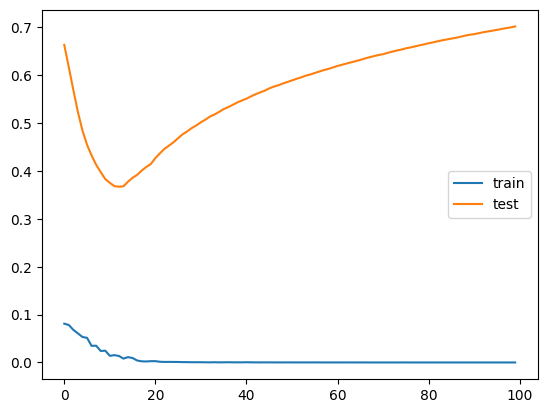

In [136]:
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()

0.8439897698209718


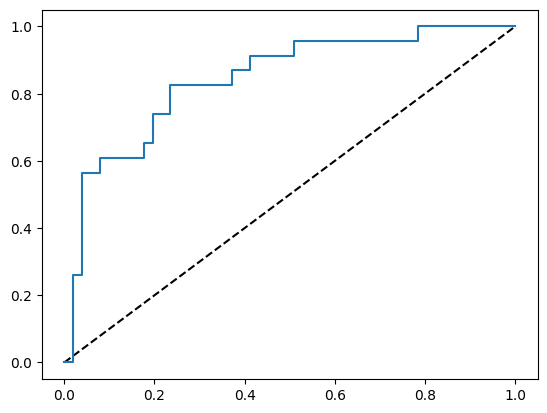

In [143]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
y_prob_mrna = mrna_model(features_testing)

fpr, tpr, thresholds = roc_curve(y_test_testing, y_prob_mrna.detach().numpy())
auc_val = metrics.auc(fpr, tpr)
auc_tf = auc_val
plt.plot(fpr, tpr, label='Pytorch mRNA (AUC: {:.2f})'.format(auc_val))
print(auc_val)

In [107]:
features = torch.tensor(mut_X_train).float()
target = torch.tensor(mut_y_train).float()

train_x = TensorDataset(features, target)
train_loader_mut = DataLoader(train_x, batch_size=10, shuffle=True)

features_test = torch.tensor(mut_X_test).float()
target_test = torch.tensor(mut_y_test).float()
test_loader_mut = DataLoader(TensorDataset(features_test, target_test), batch_size=10, shuffle=True)

In [108]:
mutation_model = MutationModel().to(device)
loss = torch.nn.BCELoss()
optimizer = torch.optim.Adam(mrna_model.parameters(), lr=1e-3)


epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader_mut, mutation_model, loss, optimizer)
    test(test_loader_mut, mutation_model, loss)

Epoch 1
-------------------------------
loss: 0.712233  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.706561 

Epoch 2
-------------------------------
loss: 0.708766  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.696810 

Epoch 3
-------------------------------
loss: 0.715095  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.701732 

Epoch 4
-------------------------------
loss: 0.699193  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.706306 

Epoch 5
-------------------------------
loss: 0.713859  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.702105 

Epoch 6
-------------------------------
loss: 0.701090  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.701861 

Epoch 7
-------------------------------
loss: 0.709120  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.701955 

Epoch 8
-------------------------------
loss: 0.686539  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.707014 

Epoch 9
----------------

In [122]:
features = torch.tensor(meth_X_train).float()
target = torch.tensor(meth_y_train).float()

train_x = TensorDataset(features, target)
train_loader_meth = DataLoader(train_x, batch_size=10, shuffle=True)

features_test = torch.tensor(meth_X_test).float()
target_test = torch.tensor(meth_y_test).float()
test_loader_meth = DataLoader(TensorDataset(features_test, target_test), batch_size=10, shuffle=True)

In [125]:
meth_model = MethModel().to(device)
loss = torch.nn.BCELoss()
optimizer = torch.optim.Adam(mrna_model.parameters(), lr=1e-3)


epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader_meth, meth_model, loss, optimizer)
    test(test_loader_meth, meth_model, loss)

Epoch 1
-------------------------------
loss: 0.697211  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.675084 

Epoch 2
-------------------------------
loss: 0.642241  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.675213 

Epoch 3
-------------------------------
loss: 0.641014  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.660634 

Epoch 4
-------------------------------
loss: 0.697087  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.676067 

Epoch 5
-------------------------------
loss: 0.680080  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.674992 

Epoch 6
-------------------------------
loss: 0.623291  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.674992 

Epoch 7
-------------------------------
loss: 0.661531  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.675186 

Epoch 8
-------------------------------
loss: 0.680056  [   10/  126]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.690032 

Epoch 9
----------------

In [126]:
y_prob_mrna = mrna_model(torch.tensor(mrna_X_test_testing).float())
y_prob_mut = mutation_model(torch.tensor(mut_X_test_testing).float())
y_prob_meth = meth_model(torch.tensor(meth_X_test_testing).float())

In [114]:
y_prob_mrna.detach().numpy()

array([[1.24157009e-06],
       [1.84798417e-08],
       [7.34878564e-12],
       [5.53293205e-07],
       [9.99995351e-01],
       [1.22895886e-11],
       [5.84398014e-21],
       [3.42534586e-05],
       [2.16156764e-08],
       [1.02273225e-04],
       [4.48542349e-02],
       [1.56196167e-10],
       [3.98823613e-06],
       [3.10236059e-09],
       [3.40860133e-04],
       [9.20220137e-01],
       [1.01178099e-13],
       [7.18533635e-01],
       [4.46708509e-05],
       [7.07282841e-01],
       [8.80779226e-06],
       [4.60154444e-01],
       [1.26827712e-04],
       [4.67243444e-06],
       [4.61861258e-03],
       [5.03395637e-03],
       [9.99449909e-01],
       [3.24484199e-01],
       [9.99728382e-01],
       [5.25292917e-13],
       [6.44309772e-03],
       [1.38425687e-02],
       [3.56174423e-05],
       [1.43923797e-04],
       [1.23574408e-02],
       [2.08905302e-02],
       [9.91551638e-01],
       [1.81419000e-06],
       [9.98403132e-01],
       [3.15873513e-06],


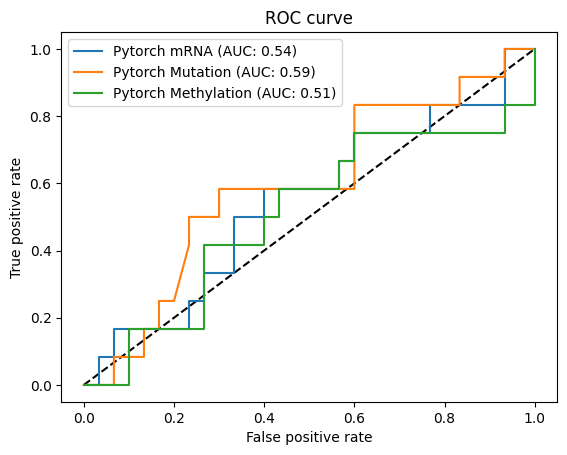

: 

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

fpr, tpr, thresholds = roc_curve(mrna_y_test_testing, y_prob_mrna.detach().numpy())
auc_val = metrics.auc(fpr, tpr)
auc_tf = auc_val
plt.plot(fpr, tpr, label='Pytorch mRNA (AUC: {:.2f})'.format(auc_val))


fpr, tpr, thresholds = roc_curve(mut_y_test_testing, y_prob_mut.detach().numpy())
auc_val = metrics.auc(fpr, tpr)
auc_tf = auc_val
plt.plot(fpr, tpr, label='Pytorch Mutation (AUC: {:.2f})'.format(auc_val))

fpr, tpr, thresholds = roc_curve(meth_y_test_testing, y_prob_meth.detach().numpy())
auc_val = metrics.auc(fpr, tpr)
auc_tf = auc_val
plt.plot(fpr, tpr, label='Pytorch Methylation (AUC: {:.2f})'.format(auc_val))


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
